### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



###**Ingreso total por cada tienda**

In [13]:
#Suman columna precio
suma_precio_t1  = tienda['Precio'].sum()
suma_precio_t2  = tienda2['Precio'].sum()
suma_precio_t3  = tienda3['Precio'].sum()
suma_precio_t4  = tienda4['Precio'].sum()

In [15]:
print("Tienda 1:", suma_precio_t1)
print("Tienda 2:", suma_precio_t2)
print("Tienda 3:", suma_precio_t3)
print("Tienda 4:", suma_precio_t4)

Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [23]:
# Agregar columna tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por Tienda y Categoría
resumen_total = df_total.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum()

print(resumen_total)


Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar     12698400.0
          Deportes y diversión        39290000.0
          Electrodomésticos          363685200.0
          Electrónicos               429493500.0
          Instrumentos musicales      91299000.0
          Juguetes                    17995700.0
          Libros                       8784900.0
          Muebles                    187633700.0
Tienda 2  Artículos para el hogar     14746900.0
          Deportes y diversión        34744500.0
          Electrodomésticos          348567800.0
          Electrónicos               410831100.0
          Instrumentos musicales     104990300.0
          Juguetes                    15945400.0
          Libros                      10091200.0
          Muebles                    176426300.0
Tienda 3  Artículos para el hogar     15060000.0
          Deportes y diversión        35593100.0
          Electrodomésticos          329237900.0
          Electrónicos             

# 3. Calificación promedio de la tienda


In [25]:
# Agregar columna Tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular promedio por tienda
promedios = df_total.groupby("Tienda")["Calificación"].mean()

print(promedios)


Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

#### Por número de productos

In [27]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    ventas = df["Producto"].value_counts()

    print(f"\n{nombre}")
    print("Más vendido:", ventas.idxmax())
    print("Menos vendido:", ventas.idxmin())




Tienda 1
Más vendido: Microondas
Menos vendido: Auriculares con micrófono

Tienda 2
Más vendido: Iniciando en programación
Menos vendido: Juego de mesa

Tienda 3
Más vendido: Kit de bancas
Menos vendido: Bloques de construcción

Tienda 4
Más vendido: Cama box
Menos vendido: Guitarra eléctrica


### Por ingreso económico

In [28]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():

    # Agrupar por producto
    resumen = df.groupby("Producto").agg({
        "Producto": "count",      # número de ventas
        "Precio": "sum"           # ingresos totales
    }).rename(columns={"Producto": "Cantidad_Vendida",
                       "Precio": "Ingreso_Total"})

    # Producto más y menos vendido (por cantidad)
    mas_vendido = resumen["Cantidad_Vendida"].idxmax()
    menos_vendido = resumen["Cantidad_Vendida"].idxmin()

    print(f"\n===== {nombre} =====")
    print("Más vendido:")
    print(resumen.loc[mas_vendido])

    print("\nMenos vendido:")
    print(resumen.loc[menos_vendido])



===== Tienda 1 =====
Más vendido:
Cantidad_Vendida          60.0
Ingreso_Total       29462300.0
Name: Armario, dtype: float64

Menos vendido:
Cantidad_Vendida         33.0
Ingreso_Total       4730800.0
Name: Auriculares con micrófono, dtype: float64

===== Tienda 2 =====
Más vendido:
Cantidad_Vendida         65.0
Ingreso_Total       3127800.0
Name: Iniciando en programación, dtype: float64

Menos vendido:
Cantidad_Vendida         32.0
Ingreso_Total       5811900.0
Name: Juego de mesa, dtype: float64

===== Tienda 3 =====
Más vendido:
Cantidad_Vendida          57.0
Ingreso_Total       16699800.0
Name: Kit de bancas, dtype: float64

Menos vendido:
Cantidad_Vendida         35.0
Ingreso_Total       1237200.0
Name: Bloques de construcción, dtype: float64

===== Tienda 4 =====
Más vendido:
Cantidad_Vendida          62.0
Ingreso_Total       32946300.0
Name: Cama box, dtype: float64

Menos vendido:
Cantidad_Vendida          33.0
Ingreso_Total       25823100.0
Name: Guitarra eléctrica, dtype: 

# 5. Envío promedio por tienda

In [29]:
# Agregar columna tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular promedio de envío por tienda
promedios_envio = df_total.groupby("Tienda")["Costo de envío"].mean().round(2)

print(promedios_envio)


Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


##**Gráfico de barras - Ingresos totales**

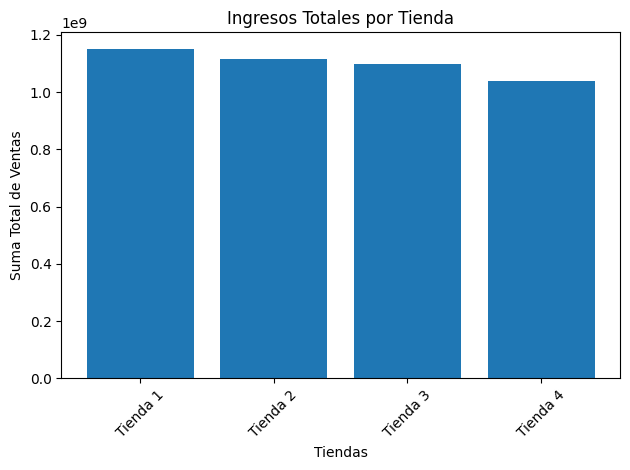

In [30]:
import matplotlib.pyplot as plt

# Sumar columna Precio
suma_precio_t1 = tienda['Precio'].sum()
suma_precio_t2 = tienda2['Precio'].sum()
suma_precio_t3 = tienda3['Precio'].sum()
suma_precio_t4 = tienda4['Precio'].sum()

# Crear listas para graficar
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [suma_precio_t1, suma_precio_t2, suma_precio_t3, suma_precio_t4]

# Crear gráfico
plt.figure()
plt.bar(tiendas, ingresos)
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Suma Total de Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**Gráfico de Ventas de Categorías por tienda**

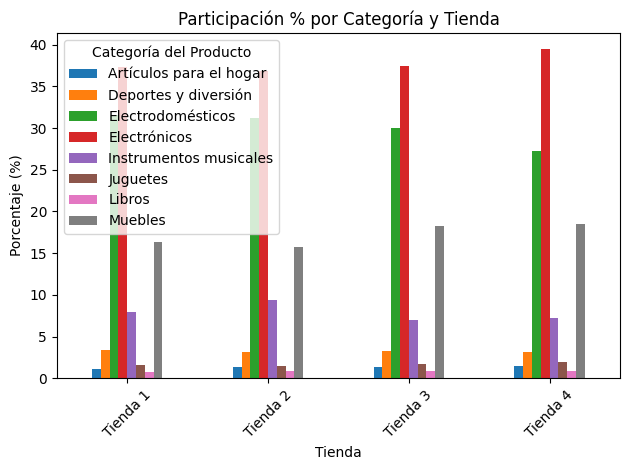

In [32]:
tabla_pct = tabla_grafico.div(tabla_grafico.sum(axis=1), axis=0) * 100

tabla_pct.plot(kind='bar')

plt.title("Participación % por Categoría y Tienda")
plt.xlabel("Tienda")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**Calificación por tienda**

Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


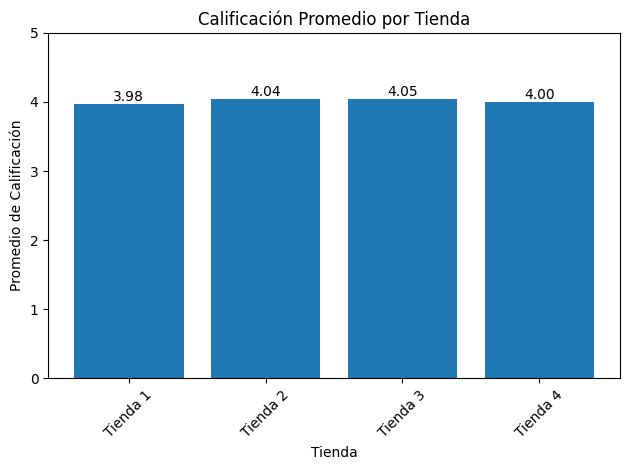

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Agregar columna Tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular promedio por tienda
promedios = df_total.groupby("Tienda")["Calificación"].mean()

print(promedios)

# Crear gráfico
plt.figure()
barras = plt.bar(promedios.index, promedios.values)

# Agregar valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'{altura:.2f}',
             ha='center',
             va='bottom')

plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Promedio de Calificación")
plt.ylim(0, 5)  # Escala típica de ratings
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
ingresos = df_total.groupby("Tienda")["Precio"].sum()

comparacion = pd.DataFrame({
    "Ingresos": ingresos,
    "Calificación Promedio": promedios
})

print(comparacion)


              Ingresos  Calificación Promedio
Tienda                                       
Tienda 1  1.150880e+09               3.976685
Tienda 2  1.116344e+09               4.037304
Tienda 3  1.098020e+09               4.048326
Tienda 4  1.038376e+09               3.995759


##**Gráfico de producto mas vendido por tienda**


Tienda 1
Más vendido: Microondas
Cantidad: 60

Tienda 2
Más vendido: Iniciando en programación
Cantidad: 65

Tienda 3
Más vendido: Kit de bancas
Cantidad: 57

Tienda 4
Más vendido: Cama box
Cantidad: 62


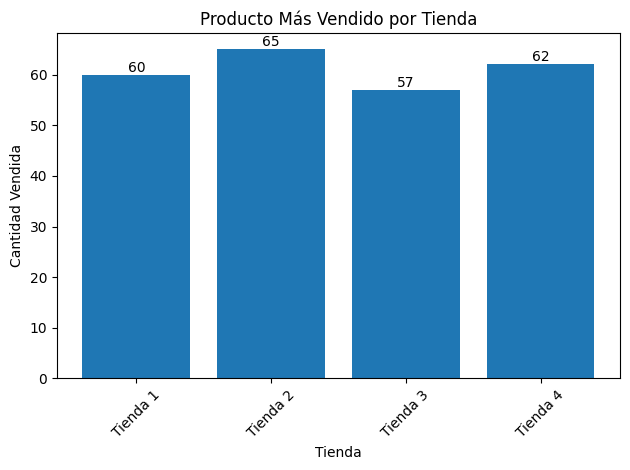

In [35]:
import matplotlib.pyplot as plt

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

productos_top = []
cantidades_top = []

for nombre, df in tiendas.items():
    ventas = df["Producto"].value_counts()

    producto_mas_vendido = ventas.idxmax()
    cantidad_mas_vendida = ventas.max()

    productos_top.append(producto_mas_vendido)
    cantidades_top.append(cantidad_mas_vendida)

    print(f"\n{nombre}")
    print("Más vendido:", producto_mas_vendido)
    print("Cantidad:", cantidad_mas_vendida)

# Crear gráfico
plt.figure()
barras = plt.bar(tiendas.keys(), cantidades_top)

# Agregar valores encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'{int(altura)}',
             ha='center',
             va='bottom')

plt.title("Producto Más Vendido por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**Costo promedio de envio por tienda**

Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


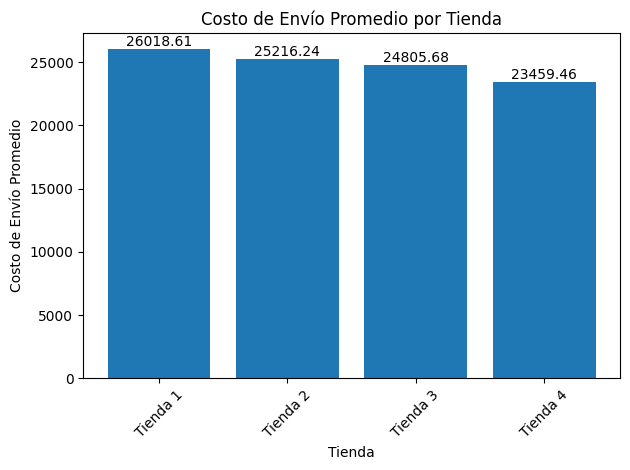

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Agregar columna tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular promedio de envío por tienda
promedios_envio = df_total.groupby("Tienda")["Costo de envío"].mean().round(2)

print(promedios_envio)

# Crear gráfico
plt.figure()
barras = plt.bar(promedios_envio.index, promedios_envio.values)

# Agregar valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'{altura:.2f}',
             ha='center',
             va='bottom')

plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de Envío Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**Informe Final**
###1. Introducción
####El presente informe tiene como objetivo analizar el desempeño comparativo de las cuatro tiendas del Sr. Juan, considerando indicadores clave de negocio: ingresos totales, ventas por categoría, productos más y menos vendidos, calificación promedio de clientes y costo de envío promedio.

####El análisis busca determinar, con base en evidencia cuantitativa, cuál tienda presenta el desempeño más débil y, por tanto, debería ser vendida como decisión estratégica.

###2. Desarrollo del Análisis
####2.1 Ingresos Totales

####Los ingresos totales por tienda fueron:

Tienda 1: 1,150,880,400
Tienda 2: 1,116,343,500
Tienda 3: 1,098,019,600
Tienda 4: 1,038,375,700

La tienda con menor facturación es Tienda 4, con una diferencia aproximada de 112 millones respecto a la Tienda 1 (la de mayor ingreso).

Desde el punto de vista estrictamente financiero, Tienda 4 muestra menor capacidad de generación de ingresos.

2.2 Ventas por Categoría

En todas las tiendas, la categoría dominante en ingresos es Electrónicos, seguida de Electrodomésticos y Muebles.

Observaciones relevantes:

Tienda 1 lidera en Electrónicos (429,493,500) y Electrodomésticos (363,685,200).

Tienda 4 presenta los valores más bajos en Electrodomésticos (283,260,200).

En categorías secundarias como Instrumentos musicales y Deportes, Tienda 4 también se mantiene por debajo de Tienda 1 y Tienda 2.

Esto evidencia que Tienda 4 no lidera en ninguna categoría estratégica y muestra menor competitividad en segmentos de alto valor.

2.3 Calificación Promedio de Clientes

Promedios obtenidos:

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05

Tienda 4: 4.00

La tienda con mejor satisfacción es Tienda 3 (4.05).
La más baja es Tienda 1 (3.98).

Sin embargo, Tienda 4 no destaca positivamente; su calificación es intermedia, sin liderazgo en experiencia del cliente.

2.4 Productos Más y Menos Vendidos

Productos más vendidos:

Tienda 1: Microondas

Tienda 2: Iniciando en programación

Tienda 3: Kit de bancas

Tienda 4: Cama box

Productos menos vendidos:

Tienda 1: Auriculares con micrófono

Tienda 2: Juego de mesa

Tienda 3: Bloques de construcción

Tienda 4: Guitarra eléctrica

Tienda 4 presenta menor diversidad de productos líderes en categorías tecnológicas, donde se concentra mayor ingreso general.

2.5 Costo de Envío Promedio

Costos promedio:

Tienda 1: 26,018.61

Tienda 2: 25,216.24

Tienda 3: 24,805.68

Tienda 4: 23,459.46

Tienda 4 tiene el costo de envío promedio más bajo, lo cual es una fortaleza competitiva, ya que el cliente asume este costo.

Sin embargo, esta ventaja logística no compensa su menor facturación total.

3. Análisis Integral

Al integrar todos los factores:

Indicador	Mejor desempeño	Peor desempeño
Ingresos Totales	Tienda 1	Tienda 4
Satisfacción	Tienda 3	Tienda 1
Costo Envío	Tienda 4 (más bajo)	Tienda 1 (más alto)
Liderazgo en Categorías	Tienda 1	Tienda 4

Aunque Tienda 4 tiene el menor costo de envío, presenta:

Menor facturación total.

Menor liderazgo en categorías estratégicas.

Ausencia de ventaja competitiva clara en ingresos.

No lidera en satisfacción.

Desde una perspectiva estratégica, es la tienda con menor aporte relativo al portafolio.

4. Conclusión y Recomendación

Con base en el análisis cuantitativo de ingresos, desempeño por categoría, productos estratégicos, satisfacción del cliente y costos logísticos, se recomienda que el Sr. Juan venda la Tienda 4.

Justificación:

Es la tienda con menor generación de ingresos.

No lidera en categorías de alto valor como Electrónicos y Electrodomésticos.

No presenta la mayor satisfacción del cliente.

Su ventaja en costo de envío no compensa la brecha de facturación.

Vender Tienda 4 permitiría concentrar recursos en las tiendas con mayor rentabilidad y mejor posicionamiento competitivo, optimizando así la eficiencia global del negocio.

Recomendación Final

Desde una perspectiva financiera y estratégica, Tienda 4 es la candidata más adecuada para la venta, ya que presenta el menor desempeño integral en comparación con las demás.

##**Extra**

In [37]:
# Agregar columna tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


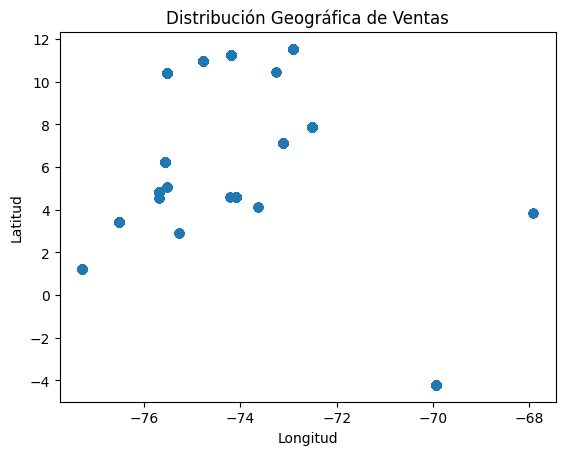

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df_total["lon"], df_total["lat"])
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución Geográfica de Ventas")
plt.show()


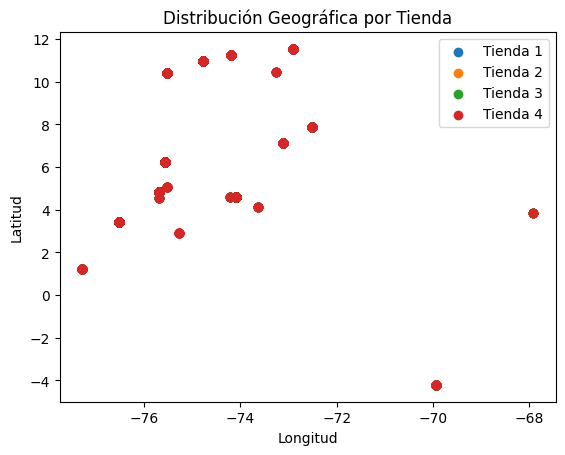

In [39]:
plt.figure()

for nombre, grupo in df_total.groupby("Tienda"):
    plt.scatter(grupo["lon"], grupo["lat"], label=nombre)

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución Geográfica por Tienda")
plt.legend()
plt.show()


In [40]:
import folium
from folium.plugins import HeatMap

# Centro promedio
mapa = folium.Map(
    location=[df_total["lat"].mean(), df_total["lon"].mean()],
    zoom_start=5
)

# Datos para heatmap
heat_data = df_total[["lat", "lon"]].values.tolist()

HeatMap(heat_data).add_to(mapa)

mapa


In [41]:
# Agrupar por tienda y calcular ingreso promedio por punto geográfico
geo_ingresos = df_total.groupby("Tienda")[["lat", "lon", "Precio"]].mean()

print(geo_ingresos)


               lat        lon         Precio
Tienda                                      
Tienda 1  5.365283 -74.789417  487867.910131
Tienda 2  5.499753 -74.742963  473227.426876
Tienda 3  5.437076 -74.733463  465459.771089
Tienda 4  5.413519 -74.774597  440362.892282


In [43]:
df_total[["lat", "lon", "Precio", "Calificación"]].corr()


,lat,lon,Precio,Calificación
lat,1.000000,-0.095653,-0.020417,-0.042178
lon,-0.095653,1.000000,-0.006839,0.009673
Precio,-0.020417,-0.006839,1.000000,0.001421
Calificación,-0.042178,0.009673,0.001421,1.000000
